# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [2]:
dir_actual = os.getcwd()
archivos_dump = list(map(lambda x: f'{dir_actual}/{x}', glob.glob('input/dump/*.csv')))

dfs = (pd.read_csv(f) for f in archivos_dump)
df = pd.concat(dfs).drop(columns='Unnamed: 0')
df.columns = ['artist', 'genre', 'song_name', 'lyrics']

In [3]:
df

,artist,genre,song_name,lyrics
0,Gorgoroth,metal,Begravelsesnatt,"Dypt i den mørke fjellhulen, jakt på Troll \n ..."
1,Gorgoroth,metal,Bergtollets Hevn,"Dypt i den mørke fjellhulen, jakt på Troll \n ..."
2,Gorgoroth,metal,Profetens Åpenbaring,Satan sender profetene syner \n De før aldri h...
3,Gorgoroth,metal,The Devil Is Calling,Go out and see the churches how they are burni...
4,Gorgoroth,metal,Slottet I Det Fjerne,Kan du oyne Slottet i det fjerne \n Og dets ly...
...,...,...,...,...
462,Bruce Springsteen,rock,A Night With The Jersey Devil,"Hear me now! \n I was born 13th child, 'neath ..."
463,Bruce Springsteen,rock,"Fun, Fun, Fun",Well she got her daddy's car \n And she cruise...
464,Bruce Springsteen,rock,Good Vibrations,Ah! I love the colorful clothes she wears \n A...
465,Bruce Springsteen,rock,New Jersey Is My Home,I'm proud new jersey is my home \n Yeah said I...


# Ejercicio 2

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
vectorizer_fit = vectorizer.fit_transform(df['lyrics'])

words = vectorizer.get_feature_names_out()
freqs = vectorizer_fit.toarray().sum(axis=0)

print(f'Las 5000 palabras mas frecuentes en la base de datos son: {words}')

Las 5000 palabras mas frecuentes en la base de datos son: ['000' '10' '100' ... 'zoo' 'zoom' 'zulu']


# Ejercicio 3

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [6]:
n_components = [5, 10, 15]
learning_decay = [0.7, 0.5]

grid = {
    'n_components': n_components,
    'learning_decay': learning_decay
}

modelo_grilla = GridSearchCV(LatentDirichletAllocation(learning_method='online'), 
                             param_grid=grid, verbose=5, cv=5)

In [8]:
X = CountVectorizer(stop_words='english', max_features=5000, max_df=0.1).fit_transform(df['lyrics'].values)

In [17]:
modelo_grilla.fit(X)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_decay=0.7, n_components=5;, score=-1163788.469 total time=  35.0s
[CV 2/5] END learning_decay=0.7, n_components=5;, score=-1473371.251 total time=  33.3s
[CV 3/5] END learning_decay=0.7, n_components=5;, score=-1321940.552 total time=  34.2s
[CV 4/5] END learning_decay=0.7, n_components=5;, score=-1171146.482 total time=  32.0s
[CV 5/5] END learning_decay=0.7, n_components=5;, score=-1475996.457 total time=  30.5s
[CV 1/5] END learning_decay=0.7, n_components=10;, score=-1180431.711 total time=  35.4s
[CV 2/5] END learning_decay=0.7, n_components=10;, score=-1488246.542 total time=  35.0s
[CV 3/5] END learning_decay=0.7, n_components=10;, score=-1341744.658 total time=  34.5s
[CV 4/5] END learning_decay=0.7, n_components=10;, score=-1192856.468 total time=  34.9s
[CV 5/5] END learning_decay=0.7, n_components=10;, score=-1493181.077 total time=  32.2s
[CV 1/5] END learning_decay=0.7, n_components=15;, scor

GridSearchCV(cv=5,
             estimator=LatentDirichletAllocation(learning_method='online'),
             param_grid={'learning_decay': [0.7, 0.5],
                         'n_components': [5, 10, 15]},
             verbose=5)

In [19]:
modelo_grilla.best_params_

{'learning_decay': 0.7, 'n_components': 5}

Los mejores parametros para el modelo son:
- learning_decay: 0.7
- n_components: 5

# Ejercicio 4

In [9]:
mejor_learning_decay = 0.7
mejor_n_components = 5
best_lda = LatentDirichletAllocation(n_components=mejor_n_components, 
                                     learning_decay=mejor_learning_decay,
                                     learning_method='online')
best_lda.fit(X) 

LatentDirichletAllocation(learning_method='online', n_components=5)

In [10]:
for topic_id, topic_name in enumerate(best_lda.components_):
# para cada tópico
    print("tópico: {}".format(topic_id + 1))
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in
    topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
ladies tony dang example nah hail yesterday round global warmth alot dope christine hol harm
tópico: 2
bein pages losing sunrise familiar dressed fresh forsake helped slang trust star ll figures drill
tópico: 3
rock roll fuse whores bridgette tool beans stretch west kissing toxic damn gin goodness bionic
tópico: 4
ones ah umm workout lyrics creation tan dies daisy bought humanity empire mall dancer dreams
tópico: 5
niggas niggaz rap funk wiz sooner bird garbage killed cheat worked vibrations goons killin chopped


- El primer topico pareciera corresponder a unos cuantos toques de hip-hop (por las palabras: ladies,
tony, dang, nah, yesterday, alot, dope, hol y harm) con pop (hail, round, global, warmth). Por lo
tanto, podria corresponder a un genero de pop con grandes influencias de hip hop.

- El segundo topico pareciera corresponder a algo de rap (por las palabras: bein, pages, losing,
sunrise, familiar, dressed, fresh, slang) con pop (familiar, dressed, helped, trust, star, figures).
Por lo tanto, podria ser hip hop con algo de pop.

- El tercer topico pareciera corresponder mas al genero de rock (por las palabras: rock, roll, fuse,
whores, bridgette, west, kissing, toxic, damn), con un poquito de country (bridgette, tool, beans)
y pop (bionic, goodness). Por lo tanto podria corresponder a un genero rock-country-pop.

- El cuarto topico pareciera corresponder a un poco de pop (ones, ah, umm, workout, daisy, mall,
dancer, dreams) con metal (creation, dies, humanity, empire). Por lo tanto, es un genero metal-pop,
o metal con un poco de letras mas cotidianas.

- El quinto topico pareciera ser en su gran mayoria rap (por las palabras: n****s/z, rap, funk, wiz,
garbage, killed, cheat, goons, killin y chopped). Por lo tanto, es un genero de rap mas puro.

Como resumen:

- 1er topico: Pop influenciado por hip hop
- 2do topico: Hip hop con pequenas influencias de pop
- 3er topico: Rock Country Pop
- 4to topico: Metal Pop
- 5to topico: Rap

# Ejercicio 5

In [31]:
fit_best_lda = best_lda.transform(X)
topics_for_each_doc = pd.DataFrame(
    np.round(fit_best_lda, 3),
    index=df['lyrics']
)

topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x),
range(1, best_lda.n_components + 1)))

concatenated_df = pd.concat([df.reset_index(drop=True), topics_for_each_doc.reset_index(drop=True)], axis=1)
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values,
axis=1) + 1

<AxesSubplot:>

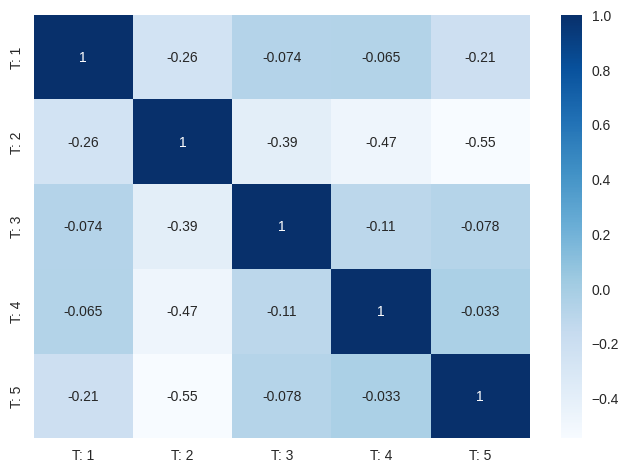

In [38]:
probs_topicos = concatenated_df.loc[:, 'T: 1':'T: 5']
sns.heatmap(probs_topicos.corr(), annot=True, cmap='Blues')

- De forma general, se puede ver que todos los topicos tienen una correlacion negativa con otros topicos. Esto estaria dando cuenta que mientras aumenta la probabilidad de aparicion de un topico, la aparicion de otro disminuye. Lo 
anterior indica que los topicos son excluyentes entre si.

- Ademas, hay ciertos grupos que son mucho mas excluyentes entre si que otros. Esto, ya que presentan
un valor de correlacion absoluto mucho mayor. Ejemplos de lo anterior son:

    - T: 1 con T: 2 y T: 5
    - T: 2 con T: 3, T: 4, T: 5
    - T: 3 con T: 4 y

Esto estaria indicando que aquellos grupos presentan una menor cantidad de topicos similares.